# 常用聚类算法对比评估
探索不同算法在不同形状数据集上的聚类效果和所需时间

In [ ]:
# Exercise 32.1
# 使用 sklearn 生成 3 组测试数据，并绘制出散点图（横排拼接子图）
'''
为了方便后续实验，你需要对 3 组测试数据进行 Min-Max 归一化处理，使得横纵坐标都在 0-1 的范围之内。

3 种方法对应的参数如下：

    三组数据均包含 100 个样本，且将随机数种子均设为 10。

    moons 和 circles 数据添加 0.1 的噪声。

    circles 数据内外圈间距比例因子设为 0.3。

    blobs 数据拥有 2 个簇，且簇标准差设为 1.5。

    其余参数取默认值。
'''
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline
moons, _ = datasets.make_moons(n_samples=100, noise=.1, random_state=10)
circles, _ = datasets.make_circles(n_samples=100, noise=.1, factor=.3, random_state=10)
blobs, _ = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=10)

# Min-Max 归一化
moons = (moons - np.min(moons)) / (np.max(moons) - np.min(moons))
circles = (circles - np.min(circles)) / (np.max(circles) - np.min(circles))
blobs = (blobs - np.min(blobs)) / (np.max(blobs) - np.min(blobs))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
axes[0].scatter(moons[:, 0], moons[:, 1])
axes[1].scatter(circles[:, 0], circles[:, 1])
axes[2].scatter(blobs[:, 0], blobs[:, 1])

In [ ]:
# Exercise 32.2 聚类结果对比
# 采用下面 8 个聚类方法分别在 moons, circles 和 blobs 上进行测试，并将聚类结果绘制成图
'''
cluster.KMeans()

cluster.MiniBatchKMeans()

cluster.AffinityPropagation()

cluster.MeanShift()

cluster.SpectralClustering()

cluster.AgglomerativeClustering()

cluster.Birch()

cluster.DBSCAN()
'''
from sklearn import cluster

### 代码开始 ### (> 10 行代码)
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 
                 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

cluster_estimators = [
    cluster.KMeans(n_clusters=2),
    cluster.MiniBatchKMeans(n_clusters=2),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=2, n_neighbors=6),
    cluster.AgglomerativeClustering(n_clusters=2),
    cluster.Birch(n_clusters=2, threshold=.1),
    cluster.DBSCAN(eps=.1, min_samples=6, metric='euclidean')
]

for algorithm_name, algorithm in zip(cluster_names, cluster_estimators):
    
    moons_clusters = algorithm.fit_predict(moons)
    circles_clusters = algorithm.fit_predict(circles)
    blobs_clusters = algorithm.fit_predict(blobs)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
    axes[0].scatter(moons[:, 0],moons[:, 1], c=moons_clusters)
    axes[1].scatter(circles[:, 0],circles[:, 1], c=circles_clusters)
    axes[2].scatter(blobs[:, 0],blobs[:, 1], c=blobs_clusters)
    axes[0].set_ylabel('{}'.format(algorithm_name))
### 代码结束 ###

In [5]:
def create_data(n):
    """
    参数:
    n -- 生成样本数量
    返回:
    blobs_data -- 样本数组
    """
    blobs_data, _ = datasets.make_blobs(
        n_samples=n, n_features=2, centers=2, cluster_std=1.5, random_state=10
    )
    return blobs_data

c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.p

KMeans fitted & average time:0.002952


c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment 

MiniBatchKMeans fitted & average time:0.034500


c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\e

AffinityPropagation fitted & average time:0.614185
MeanShift fitted & average time:0.814568


c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hanwenZ\anaconda3\envs\deeplearn\Lib\site-packages\sklearn\cluster\_kmeans.p

SpectralClustering fitted & average time:0.274864
AgglomerativeClustering fitted & average time:0.005100
Birch fitted & average time:0.009502
DBSCAN fitted & average time:0.002000


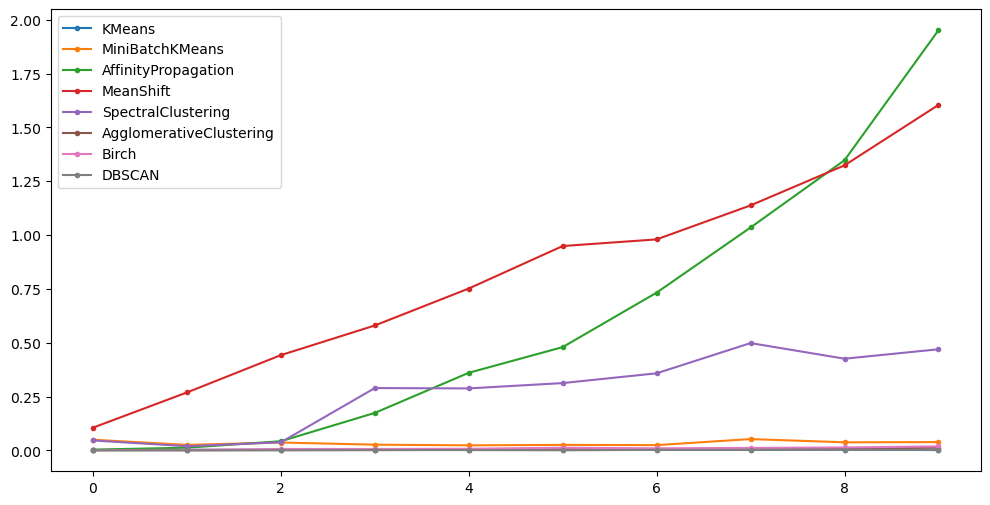

In [6]:
# Exercise 32.3 
# 使用 create_data(n) 生成不同规模的测试数据，并计算不同算法的聚类时间，且绘制对应的折线图
import time

### 代码开始 ### (> 10 行代码)
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 
                 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

cluster_estimators = [
    cluster.KMeans(n_clusters=2),
    cluster.MiniBatchKMeans(n_clusters=2),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=2),
    cluster.AgglomerativeClustering(n_clusters=2),
    cluster.Birch(n_clusters=2),
    cluster.DBSCAN()
]

cluster_t_list = []
for algorithm_name, algorithm in zip(cluster_names, cluster_estimators):
    t_list = []
    for num in [i for i in range(100, 1100, 100)]:
        data = create_data(num) # 生成数据
        t0 = time.time()
        moons_clusters = algorithm.fit(data)
        t1 = time.time()
        t_list.append(t1 - t0) # 计算聚类时间
    print("{} fitted & average time:{:4f}".format(algorithm_name, np.mean(t_list)))
    cluster_t_list.append(t_list)

plt.figure(figsize=(12, 6))
for cluster_t, cluster_name in zip(cluster_t_list, cluster_names):
    plt.plot(cluster_t, marker='.', label=cluster_name)
    plt.legend()
### 代码结束 ###